# Analysis of iGRNA data from 20170215 

In [1]:
from FlowCytometryTools import *
import os
#You will need to update where your base directory is
base_dir = 'C:\\Users\heine\github\AHN_FlowTools'
os.chdir(base_dir) 
from core import AHN_FlowTools
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from itertools import chain

sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline
#%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#You will need to update yoru data directory
datadir = "C:\\Users\\heine\\Google Drive\\UCSF\\ElSamad_Lab\\CRISPR iGRNA\\experiments\\flow_cytometry\\ahn20170215\\"
date = '20170215'

allfiles = {}
plates = ['igRNA_t0','igRNA_t1','igRNA_t2']

for plate in plates: 
    files = glob.glob(datadir +  plate + os.sep +'*.fcs')
    allfiles[plate] = files

In [4]:
rows = ['A','B','C','D','E','F','G','H']
cols = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [5]:
plateraw = pd.DataFrame(index = rows, columns = cols)

panelDict = {plate:plateraw for plate in plates}
allplates = pd.Panel(panelDict)

In [6]:
for plate in plates:
    for f in allfiles[plate]:
        c = f[-6:-4]
        r = f[-7]
        call = r + c
        allplates[plate].set_value(r, c, FCMeasurement(ID = call, datafile = f))

In [7]:
FITCnorm = {}
mCherrynorm = {}
FITC = {}
mCherry = {}

for plate in plates: 
    [FITCnorm[plate], mCherrynorm[plate]] = AHN_FlowTools.FCdatastats(allplates[plate],1,rows,cols,100,1000)
    [FITC[plate], mCherry[plate]] = AHN_FlowTools.FCdatastats(allplates[plate],0,rows,cols,100,1000)
    

In [8]:
FITCnorm['igRNA_t2'].med

,01,02,03,04,05,06,07,08,09,10,11,12
A,17.4749,17.4648,17.699,17.4382,16.6827,14.0105,16.0153,13.9429,16.0661,16.1711,16.0737,15.6847
B,18.0417,16.0461,17.9675,17.1765,16.3532,14.642,16.2322,14.3883,16.6698,15.8352,15.7859,16.2055
C,17.2974,17.5338,16.8471,17.4175,15.9832,13.6844,16.1555,13.4139,16.5076,16.1774,15.4947,16.0906
D,17.6257,16.1405,16.4868,16.0917,14.8232,11.4322,15.2988,13.2288,15.8065,16.462,16.4382,15.3453
E,17.2767,17.0442,16.1166,16.6804,15.2165,10.1038,15.6256,13.1404,15.6209,15.5353,14.9054,15.8824
F,17.1213,17.633,16.4131,17.426,15.849,10.5207,16.4559,14.7269,17.0102,16.4861,16.2719,16.6901
G,17.635,17.1687,16.1892,17.3596,15.6512,10.8711,16.3153,13.7273,16.5243,16.5201,15.961,16.2698
H,17.3663,14.1459,0.422646,17.0785,5.65561,0.226097,18.7845,17.6586,0.0316172,18.1935,17.9895,0.0969414


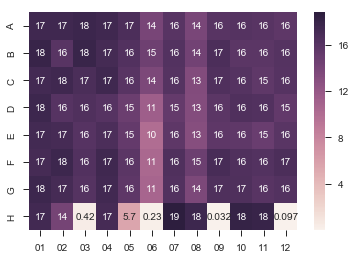

In [9]:
#Makes heatmap of FITCnorm for igRNA_t2 plate
sns.heatmap(FITCnorm['igRNA_t2'].med.iloc[0:8,0:12].astype(float), annot=True)


In [9]:
#Data frame for gfp targets with theophylline titration
layer_names = ['Target','Aptamer']
targets = ['gfp1','gfp2']
aptamers = ['on','MHF30','MHF37','RXB11','off']      
experiment_setup = [targets, aptamers]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
print(data_index.levels)
print(data_index.names)

[[u'gfp1', u'gfp2'], [u'MHF30', u'MHF37', u'RXB11', u'off', u'on']]
[u'Target', u'Aptamer']


In [15]:
AHN_FlowTools.view_or_input_exp_design(data_index)

print out list (1) or add wells one by one (2)1
['gfp1', 'on']
['gfp1', 'MHF30']
['gfp1', 'MHF37']
['gfp1', 'RXB11']
['gfp1', 'off']
['gfp2', 'on']
['gfp2', 'MHF30']
['gfp2', 'MHF37']
['gfp2', 'RXB11']
['gfp2', 'off']


C:\Users\heine\AppData\Local\Enthought\Canopy\edm\envs\bmh_python27\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: divide by zero encountered in log


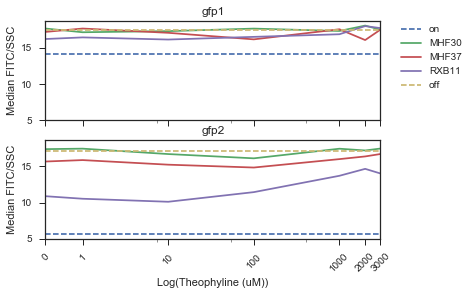

In [42]:
#Plot of theophylline dosage

#Make a dataframe with column for each dose of theophylline
concs = [0,1,10,100,1000,2000,3000]
rows = 'GFEDCBA'
columns = {'gfp1':['01','02','03'],'gfp2':['04','05','06']}
on_locs = {'gfp1': ('H','02'), 'gfp2':('H','05')}
off_locs = {'gfp1':('H','01'),'gfp2':('H','04')}

plate_locations = {}
for target in targets: 
    plate_locations_target = {}
    for jj,conc in enumerate(concs):
        plate_locations_target_conc = [on_locs[target]]
        row = rows[jj]
        for column in columns[target]:
            plate_locations_target_conc.append((row,column))
        plate_locations_target_conc.append(off_locs[target])
        plate_locations_target[conc] = plate_locations_target_conc
    plate_locations[target] = plate_locations_target

plate_locations

#input median normalized fitc into dataframe with multiindex for each column
FITCnorm_med = {}
for conc in concs: 
    FITCnorm_med_conc = []
    for target in targets:
        FITCnorm_med_conc.append([FITCnorm['igRNA_t2'].med.loc[loc[0]][loc[1]] for loc in plate_locations[target][conc]])
    
    FITCnorm_med[conc] = list(chain.from_iterable(FITCnorm_med_conc))

FITCnorm_med_df = pd.DataFrame(FITCnorm_med,index = data_index)

fig,ax = plt.subplots(2,1,sharex = True, sharey = True)
log_0 = -1.0 #Value to use to plot log of zero dose
new_columns = np.log(concs)
new_columns[0] = log_0

for jj,target in enumerate(targets): 
    FITCnorm_med_targ_df = FITCnorm_med_df.xs(target,level='Target')
    FITCnorm_med_targ_df.columns = new_columns
    FITCnorm_med_targ_df.T.plot(ax = ax[jj],legend=False,style = ['--','-','-','-','--'],title=target)
    ax[jj].set_xticks(new_columns)
    ax[jj].set_ylabel('Median FITC/SSC')

    
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].set_xlabel('Theophyline (uM)')
ax[1].set_xticklabels([str(conc) for conc in concs],rotation=45)



(0.0, 2.0)

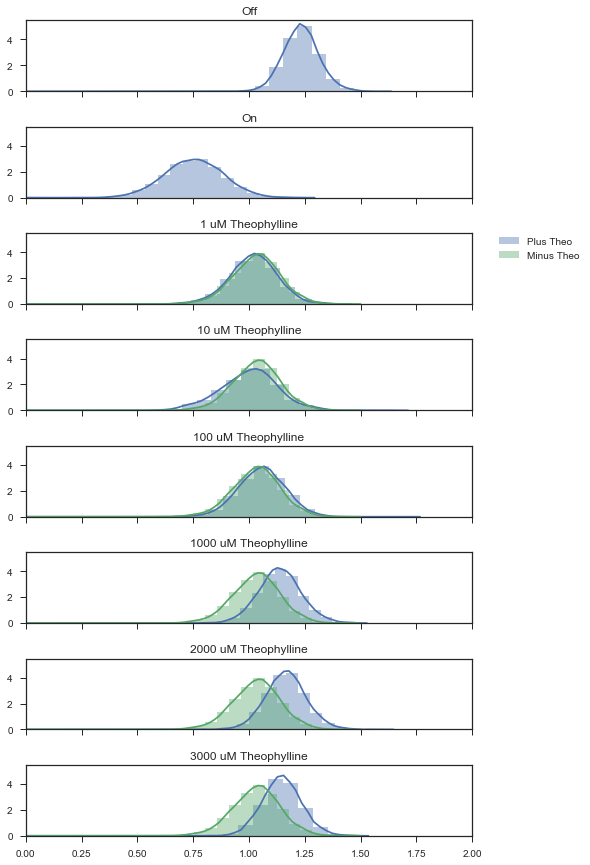

In [84]:
#Plot histogram in a column
#start with off, then on, then for each dose plot 0 and that dose on the same line

target = 'gfp2'
aptamer = 'RXB11'
aptamer_order = {'MHF30':0,'MHF37':1,'RXB11':2}
aptamer_column = columns[target][aptamer_order[aptamer]]

fig,ax = plt.subplots(8,1,sharex = True, sharey = True,figsize = (8,15))

#Off
loc = off_locs[target] 
sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc[0]][loc[1]]),ax = ax[0])
ax[0].set_title("Off")

#On
loc = on_locs[target] 
sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc[0]][loc[1]]),ax = ax[1])
ax[1].set_title("On")

for jj,conc in enumerate(concs[1:]):
    #first plot concentration of interest
    loc = (rows[1:][jj],aptamer_column)
    sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc[0]][loc[1]]),ax = ax[jj+2], label = 'Plus Theo')
    ax[jj+2].set_title(str(conc) + ' uM Theophylline')
    
    #then plot 0 concentration
    loc_0 = (rows[0],aptamer_column)
    sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc_0[0]][loc_0[1]]),ax = ax[jj+2],label='Minus Theo')

ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.subplots_adjust(hspace=0.5)
ax[7].set_xlim([0.0,2.0])